In [196]:
import os
os.getcwd()
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

TASK 1

In [124]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
file_path = "C:/Users/faisa/OneDrive/Desktop/ML-Asignment/titanic3.xls"
df = pd.read_excel(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Firstly, we uploaded the data using pandas

In [127]:
print(("Dataset shape:"),df.shape)

Dataset shape: (1309, 14)


In [128]:
print("Coloumn info:")
print(df.info())

Coloumn info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [129]:
print("Missing values number:")
print(df.isnull().sum())

Missing values number:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [130]:
print(df.dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [131]:
print("Summary Statistics: ")
print(df.describe())

Summary Statistics: 
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [132]:
print("Unique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical columns:
name: 1307 unique values
sex: 2 unique values
ticket: 939 unique values
cabin: 186 unique values
embarked: 3 unique values
boat: 28 unique values
home.dest: 369 unique values


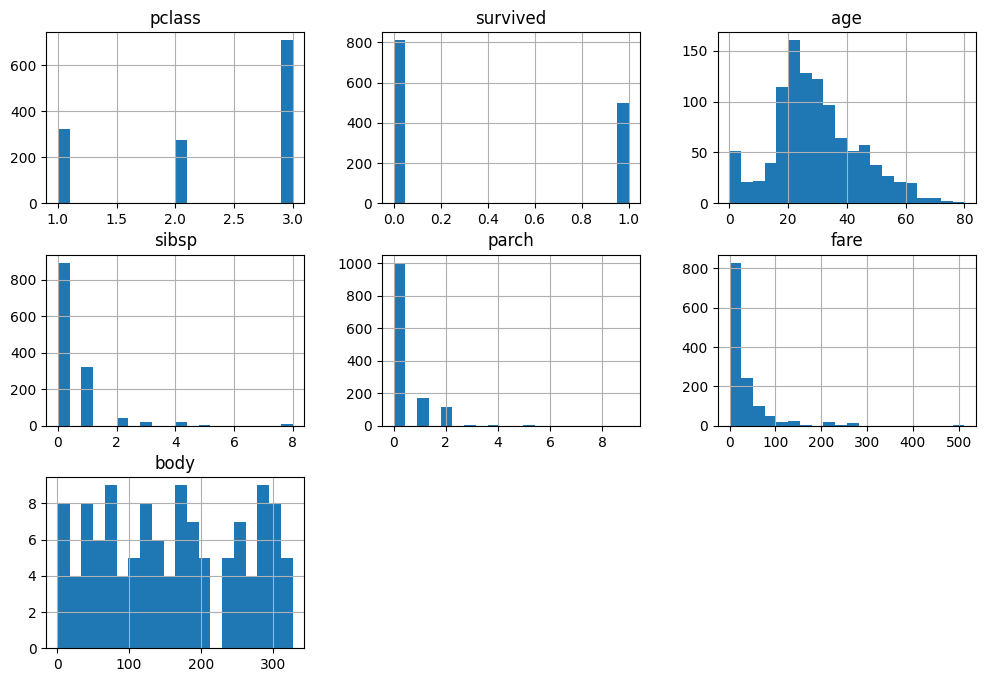

In [133]:
df.hist(figsize=(12,8), bins = 20)
plt.show()

This histogram plot shows the distribution of numerical variables in the dataset. Pclass and survived are categorical, as they have more passengers in 3rd class and fewer survivors. Fare is right-skewed which means most passengers paid more lower fares with some high amounts. SipSp and parch have many passengers with 0 relatives, but a few had large families, but some had large families. Body is uniformly distributed as it might have some missing values.

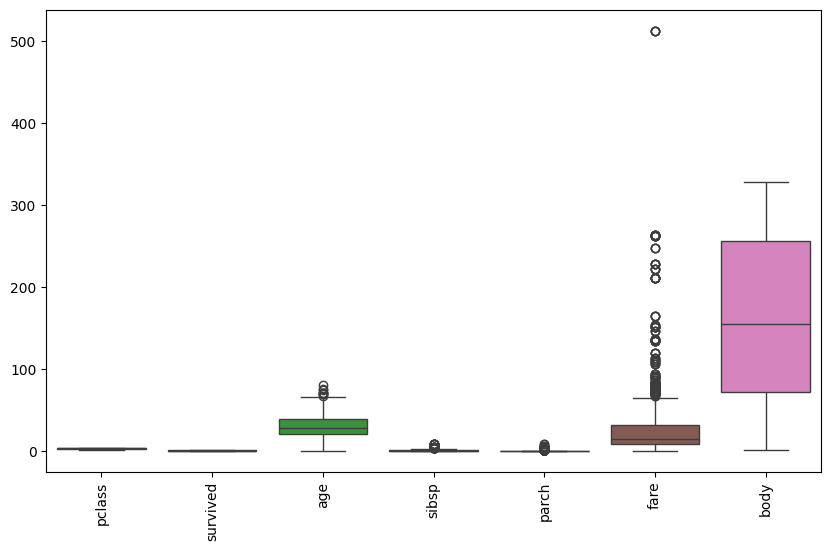

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

As you can see, pclass and survived have no variability since they are categorical, age has moderate spread with some outliers while sibsp and parch show small values with a few large families. Fare has many extreme outliers, idicating that some people paid a lot for thei ticket. Body has the largest spread, as it may have some missing values.

In [136]:
df_numeric = df.select_dtypes(include=['number'])

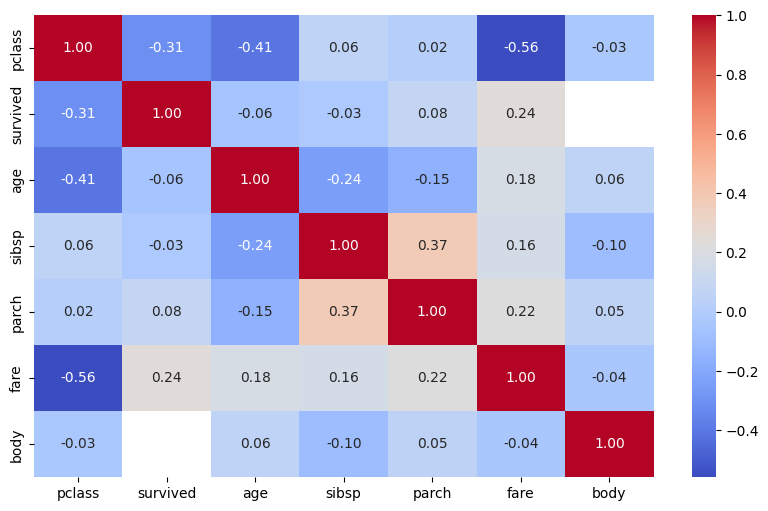

In [137]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot = True, cmap= 'coolwarm', fmt=".2f")
plt.show()

This correlation heatmap shows relationships between numerical variables. Pclass and fare have a very strong negative correlation of -0.56, this means higher class passengers paid more. Survived and pclass also has a negative correlation of -0.31 meaning higher-class passengers had a higher survival rate. Sibsp and parch are positively correlated this means that families travelled together. Fare has a weak positive correlations with survived and parch (0.24,0.22). this means that passengers with higher price tickets and families had a better chance of survival. Body has low correlations meaning it does not strongly relate to any other features.

TASK 2

In [138]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:\n", missing_percentage[missing_percentage > 0])

Missing values per column:
 age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Percentage of missing values:
 age          20.091673
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


In [139]:
df.fillna(df.median(numeric_only=True), inplace=True)  

for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()  
    if not mode_value.empty:  
        df[col].fillna(mode_value.iloc[0], inplace=True)  

C:\Users\faisa\AppData\Local\Temp\ipykernel_6216\3926561171.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value.iloc[0], inplace=True)


I decided to fill the missing values in numerical values with the median, as the median is less affected by extreme values than the mean, I also filled the missing values in categorical values with the mode.

In [140]:
print(df.isnull().sum()) 


pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


This here shows that there are no more missing values.

In [141]:
df.to_csv("cleaned_dataset.csv", index=False)


TASK 3

In [142]:
columns_to_drop = ['name', 'ticket', 'home.dest'] 
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Dataset shape after dropping high-cardinality columns:", df.shape)

Dataset shape after dropping high-cardinality columns: (1309, 11)


I decided to drop some categorical columns that are unique as while I was doing task 7 I realized after I used the One-Hot Encoder I got a larger number of columns which made my data very unclear, so I removed these columns as they are not very important

In [143]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['sex', 'cabin', 'embarked', 'boat'], dtype='object')


These are all the categorical values that we have left in our data that we are going to use.

In [144]:
print(df.shape)


(1309, 11)


In [145]:
low_cardinality_cols = [col for col in categorical_columns if df[col].nunique() < 10]

encoder = OneHotEncoder(drop='first', sparse_output=False) 

encoded_columns = encoder.fit_transform(df[low_cardinality_cols])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(low_cardinality_cols))

df = df.drop(columns=low_cardinality_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

print("New dataset shape after encoding:", df.shape)


New dataset shape after encoding: (1309, 12)


In [146]:
print(df.shape)

(1309, 12)


TASK 4

In [147]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns to scale:", numerical_columns)


Numerical columns to scale: Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body',
       'sex_male', 'embarked_Q', 'embarked_S'],
      dtype='object')


This shows all the numerical values so we only apply scaling to them.

In [148]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Standardization complete! Data is now centered around 0.")


Standardization complete! Data is now centered around 0.


Standardization centers data around 0 and scales it so that the standard deviation is 1.

In [149]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Normalization complete! Data is now scaled between 0 and 1.")

Normalization complete! Data is now scaled between 0 and 1.


Normalization scales data between 0 and 1 using the formula 
(𝑥−min)/(max−min), making it useful for models like KNN and Neural Networks that rely on distance measurements. Standardization, on the other hand, transforms data to have a mean of 0 and a standard deviation of 1 using (x−mean)/std, which is better for models like Logistic Regression and SVM that assume normally distributed data. Normalization is ideal when feature ranges vary significantly, while standardization works best for normally distributed data.

In [150]:
df.to_csv("scaled_dataset.csv", index=False)
print("Scaled dataset saved successfully!")

Scaled dataset saved successfully!


TASK 5

In this task we want the split the data into training set, testing set and validation set.

In [151]:
target_column = "survived"

In [152]:
X = df.drop(columns=[target_column])
Y = df[target_column]

In [153]:
print("Features shape (X):", X.shape)
print("Target shape (Y):", Y.shape)

Features shape (X): (1309, 11)
Target shape (Y): (1309,)


X contains all the input features except the target variable and the y contains only the target variable (survived or not)

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

First we split the data into training and testing.

In [155]:
print("Training & Testing sets created!")
print("Training set size:", X_train.shape, Y_train.shape)
print("Testing set size:", X_test.shape, Y_test.shape)

Training & Testing sets created!
Training set size: (1047, 11) (1047,)
Testing set size: (262, 11) (262,)


Now we will split the training into training and validation.

In [156]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("Validation set created!")
print("Final Training set size:", X_train.shape, Y_train.shape)
print("Validation set size:", X_val.shape, Y_val.shape)

Validation set created!
Final Training set size: (837, 11) (837,)
Validation set size: (210, 11) (210,)


In [158]:
train_df = pd.concat([X_train, Y_train], axis=1)
test_df = pd.concat([X_test, Y_test], axis=1)
val_df = pd.concat([X_val, Y_val], axis=1)

In [159]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)

print("Training, Testing, and Validation sets saved successfully!")

Training, Testing, and Validation sets saved successfully!


TASK 6

We need to check if there is class imbalance, unequal distribution.

In [171]:
print("Class distribution before resampling:")
print(Y_train.value_counts())

Class distribution before resampling:
survived
0.0    549
1.0    288
Name: count, dtype: int64


In [172]:
print(X_train.select_dtypes(include=['object']).columns)


Index(['cabin', 'boat'], dtype='object')


In [165]:
print(df[['cabin', 'boat']].isnull().sum())

cabin    0
boat     0
dtype: int64


In [166]:
print(df['cabin'].nunique(), "unique values in Cabin")
print(df['boat'].nunique(), "unique values in Boat")

186 unique values in Cabin
28 unique values in Boat


I realized that since these both Cabin and boat have string values and SMOT only work in numerical values, so as there are a lot of unique values in cabin and boat so I will drop them

In [176]:
df.drop(columns=['cabin', 'boat'], inplace=True, errors='ignore')

In [181]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['cabin', 'boat'], dtype='object')


In [179]:
df.drop(columns=['Cabin', 'Boat'], inplace=True, errors='ignore')

In [180]:
df.drop(columns=['cabin', 'boat'], inplace=True, errors='ignore')

In [182]:
print("X_train Columns:", X_train.columns)
print("X_test Columns:", X_test.columns)
print("X_val Columns:", X_val.columns)

X_train Columns: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'boat', 'body',
       'sex_male', 'embarked_Q', 'embarked_S'],
      dtype='object')
X_test Columns: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'boat', 'body',
       'sex_male', 'embarked_Q', 'embarked_S'],
      dtype='object')
X_val Columns: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'boat', 'body',
       'sex_male', 'embarked_Q', 'embarked_S'],
      dtype='object')


In [183]:
columns_to_drop = ['cabin', 'boat']

X_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
X_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')
X_val.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [184]:
print("Updated X_train columns:", X_train.columns)
print("Updated X_test columns:", X_test.columns)
print("Updated X_val columns:", X_val.columns)

Updated X_train columns: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'body', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')
Updated X_test columns: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'body', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')
Updated X_val columns: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'body', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')


In [185]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print("Class distribution after SMOTE:")
print(Y_train_resampled.value_counts())

Class distribution after SMOTE:
survived
0.0    549
1.0    549
Name: count, dtype: int64


In [186]:
print("Original training shape:", X_train.shape, Y_train.shape)
print("Resampled training shape:", X_train_resampled.shape, Y_train_resampled.shape)

Original training shape: (837, 9) (837,)
Resampled training shape: (1098, 9) (1098,)


In [187]:
X_train, Y_train = X_train_resampled, Y_train_resampled

In [188]:
print("Class distribution after resampling:")
print(Y_train.value_counts())

Class distribution after resampling:
survived
0.0    549
1.0    549
Name: count, dtype: int64


TASK 7

Now i will do a heatmap to calculate the correlation between features, and if a feature has very high correlation it will be removed.

In [189]:
correlation_matrix = df.corr()

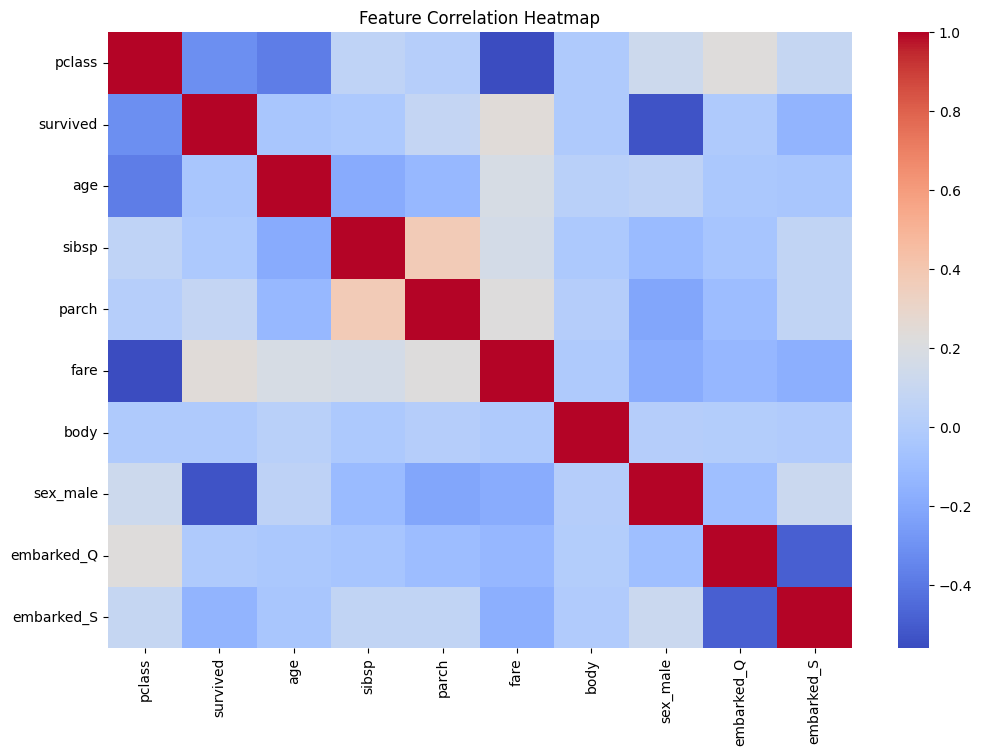

In [190]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

As you can see, the diagonal elements of the heatmap are always deep red, as each feature is perfectly correlated with itself with correlation 1.The pclass (passenger class) variable shows a negative correlation with survived, indicating that passengers in lower classes had a lower survival rate which aligns with the Titanic disaster.Fare and pclass show a strong negative correlation, suggesting that passengers in first class paid significantly more for their tickets than those in third class. The sex_male variable has a strong negative correlation with survived, meaning that males were less likely to survive compared to females. Meanwhile, sibsp (number of siblings/spouses) and parch (number of parents/children) show a moderate positive correlation, meaning that families often traveled together, and passengers with more relatives on board had a slightly higher survival chance. The body feature, which indicates if a body was recovered, has a negative correlation with survival since individuals with recorded body IDs did not survive. The embarked locations (Embarked_S and Embarked_Q) show little correlation with survival, meaning that the point of embarkation did not significantly influence survival chances. This heatmap is useful for feature selection, as variables with very high correlation may introduce redundancy, leading to model inefficiencies. For example, if sibsp and parch are highly correlated, one of them can be dropped without losing much informatio.Strong correlations with the target variable  indicate which features are likely to be important predictors. Based on this heatmap, sex, fare, and pclass appear to be key features influencing survival. 

Now we need to identify highly correlated feautures.

In [191]:
correlation_threshold = 0.9  
highly_correlated_features = set()

In [ ]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_name = correlation_matrix.columns[i]
            highly_correlated_features.add(col_name)

In [193]:
print("Highly correlated features to remove:", highly_correlated_features)

Highly correlated features to remove: set()


In [194]:
df.drop(columns=highly_correlated_features, inplace=True)
print("Dataset shape after dropping correlated features:", df.shape)

Dataset shape after dropping correlated features: (1309, 10)


TASK 8

Now that the data is ready we will train multiple models and evaluate their perforemance and we need to select the best model with the best performance for our data set.

In [198]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [199]:
Y_val_pred = log_reg.predict(X_val)

In [200]:
results_df = pd.DataFrame({"Actual": Y_val, "Predicted": Y_val_pred})
print(results_df.head(10))

      Actual  Predicted
720      0.0        0.0
500      0.0        0.0
202      1.0        0.0
161      1.0        1.0
296      1.0        1.0
1265     0.0        1.0
464      0.0        0.0
934      1.0        1.0
660      1.0        1.0
691      0.0        0.0


C:\Users\faisa\AppData\Local\Temp\ipykernel_6216\2873232045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_val_pred, palette="coolwarm")


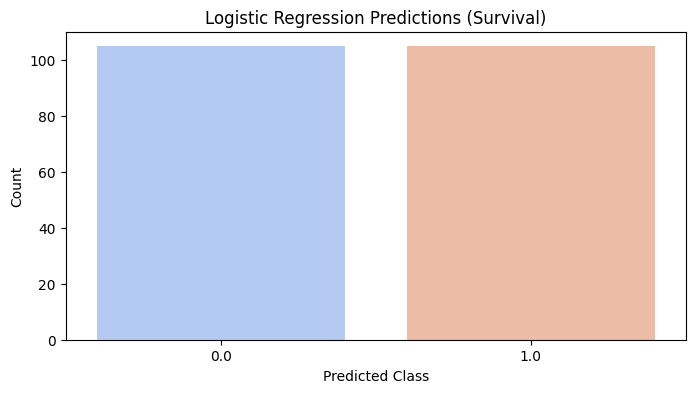

In [202]:
plt.figure(figsize=(8, 4))
sns.countplot(x=Y_val_pred, palette="coolwarm")
plt.title("Logistic Regression Predictions (Survival)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()